In [1]:
import os
os.chdir('C://Users//vnino//Desktop//U//CE888 Data Science//Assignment 1//Final Datasets//Mushrooms')

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}",
                                     r"\usepackage{amsmath}"]

In [7]:
names=['label', 'cap_shape', 'cap_surface', 
       'cap_color', 'bruises', 'odor', 
       'gill_attachment', 'gill_spacing', 'gill_size',
       'gill_color', 'stalk_shape', 'stalk_root', 
       'stalk_surface_above', 'stalk_surface_below', 
       'stalk_color_above', 'stalk_color_below', 'veil_type',
       'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population','habitat']
df = pd.read_csv("agaricus-lepiota.csv", names=names)

In [9]:
df.shape

(8124, 23)

In [8]:
df.head()

,label,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below,stalk_color_above,stalk_color_below,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
df.describe()

,label,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below,stalk_color_above,stalk_color_below,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
#Distribution of categories of the features
for var in df.columns:
    print(df[var].value_counts()/8124)

e    0.517971
p    0.482029
Name: label, dtype: float64
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap_shape, dtype: float64
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: cap_surface, dtype: float64
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
r    0.001969
u    0.001969
Name: cap_color, dtype: float64
f    0.584441
t    0.415559
Name: bruises, dtype: float64
n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: odor, dtype: float64
f    0.974151
a    0.025849
Name: gill_attachment, dtype: float64
c    0.838503
w    0.161497
Name: gill_spacing, dtype: float64
b    0.690793
n    0.309207
Name: gill_size, dtype: float64
b    0.212703
p    0.183653
w    0.147957
n    0.129000
g    0.092565
h    0.090103
u    0.060561
k    0.050222
e    0.011817
y    0.010586
o    0.007878
r    0.00295

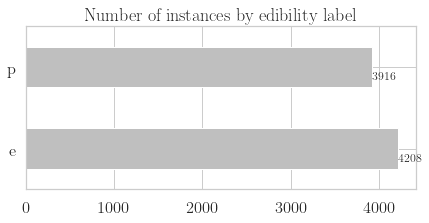

In [15]:
plot1=df['label'].value_counts().plot(kind='barh', color='0.75', title='Number of instances by edibility label', figsize=(7,3));

for i, v in enumerate(df['label'].value_counts()):
   plot1.text(v + 2, i-0.15 , str(v), fontsize='large')
plot1

In [19]:
pd.crosstab(index=df['stalk_root'], columns=df["label"])

label,e,p
stalk_root,,
?,720,1760
b,1920,1856
c,512,44
e,864,256
r,192,0
